NOTE: This problem is a significantly more challenging version of <a href="problem=81">Problem 81</a>
In the $5$ by $5$ matrix below, the minimal path sum from the top left to the bottom right, by moving left, right, up, and down, is indicated in bold red and is equal to $2297$.

$$
\begin{pmatrix}
\color{red}{131} & 673 & \color{red}{234} & \color{red}{103} & \color{red}{18}\\
\color{red}{201} & \color{red}{96} & \color{red}{342} & 965 & \color{red}{150}\\
630 & 803 & 746 & \color{red}{422} & \color{red}{111}\\
537 & 699 & 497 & \color{red}{121} & 956\\
805 & 732 & 524 & \color{red}{37} & \color{red}{331}
\end{pmatrix}
$$
Find the minimal path sum from the top left to the bottom right by moving left, right, up, and down in <a href="resources/documents/0083_matrix.txt">matrix.txt</a> (right click and "Save Link/Target As..."), a 31K text file containing an $80$ by $80$ matrix.

# starting matrix setup
#### this is just putting the cv file into a matrix
---

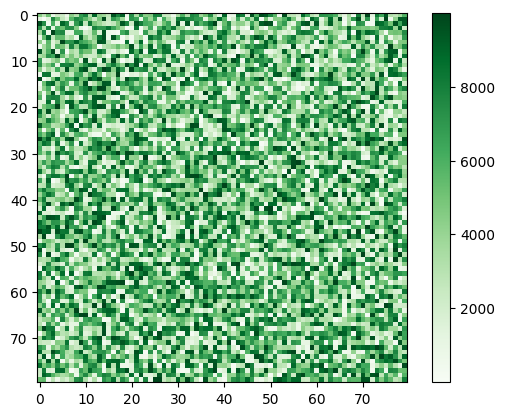

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Map = open("src/matrix.cv","r")
MapString = Map.read()

Matrix =[]

for i in MapString.split("\n"):
   Matrix.append(i.split(","))

for x in range(len(Matrix)):
   for y in range(len(Matrix[x])):
      Matrix[x][y] = int(Matrix[x][y])

Matrix= np.array(Matrix)

plt.imshow(Matrix,cmap ="Greens")
plt.colorbar()

425185.0


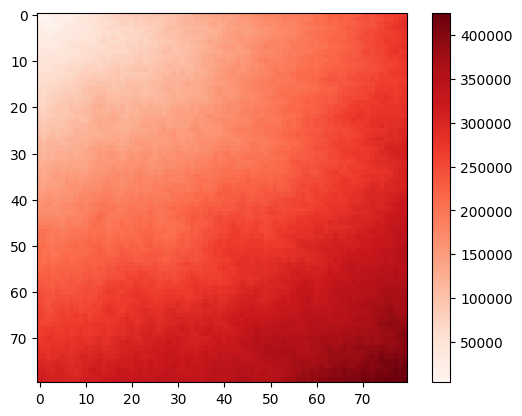

In [5]:
infinity = float('inf')
moves = [(1,0),(0,1),(-1,0),(0,-1)]
Start = [(0,0)]
Target = (79,79)
LeastPath = Matrix * infinity
for node in Start:
    LeastPath[node] = Matrix[node]
UnExplored = set()
for  node in Start: UnExplored.add(node)

def inBounds(node):
    return node[1] >=0 and node[0] >=0 and node[1] <80 and node[0] <80

while len(UnExplored) != 0:
    
    UnExploredLeastPath = infinity
    for node in UnExplored: 
        if node == Target:
            UnExploredLeastNode = node
            break  
        if UnExploredLeastPath > LeastPath[node]:
             UnExploredLeastNode = node
             UnExploredLeastPath =  LeastPath[node]
        
    Position = UnExploredLeastNode
    UnExplored.remove(Position)
    
    ConnectedNodes = np.add(moves,Position)
    #now bound them, in bounds
    ConnectedNodes= filter(inBounds, ConnectedNodes)
    for node in ConnectedNodes:
        node = tuple(node)
        #prevent looping infinitley
        if LeastPath[node] == infinity:
            UnExplored.add(node)
            
        if  LeastPath[node] > LeastPath[Position] + Matrix[node]:
            LeastPath[node] = LeastPath[Position] + Matrix[node]
            
    if Position == Target :
        print(LeastPath[Position])
        break
            
plt.imshow(LeastPath,cmap ="Reds")    
plt.colorbar()       
            